In [ ]:
# Üsküdar Üniversitesi
# Yapay Sinir Ağları Ara Sınav Projesi
# Vahap Ayzet
# 234329054

In [ ]:
import pandas as pd # Veri işleme
import numpy as np # Veri işleme,
import matplotlib.pyplot as plt #(görselleştirme)
import seaborn as sns #(görselleştirme)
import os # OS
import sklearn # sklearn (model oluşturma, veri ayırma, performans metrikleri)
import tensorflow as tf # Tensorflow (model oluşturma, veri ayırma, performans metrikleri)
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical # For one-hot encoding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential # Sequential'ı tensorflow.keras.models'dan içe aktar
from tensorflow.keras.layers import Dense # Dense'i tensorflow.keras.layers'dan içe aktar
from imblearn.over_sampling import SMOTE
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Activation
from sklearn.cluster import KMeans
import numpy as np


import cv2

In [ ]:
!wget https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip

--2024-11-25 19:22:23--  https://sid.erda.dk/public/archives/ff17dc924eba88d5d01a807357d6614c/FullIJCNN2013.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1661866983 (1.5G) [application/zip]
Saving to: ‘FullIJCNN2013.zip’

FullIJCNN2013.zip   100%[===================>]   1.55G   105MB/s    in 15s     

2024-11-25 19:22:38 (105 MB/s) - ‘FullIJCNN2013.zip’ saved [1661866983/1661866983]



In [ ]:
!unzip FullIJCNN2013.zip -d traffic_sign_data

Archive:  FullIJCNN2013.zip
   creating: traffic_sign_data/FullIJCNN2013/
   creating: traffic_sign_data/FullIJCNN2013/00/
  inflating: traffic_sign_data/FullIJCNN2013/00000.ppm  
  inflating: traffic_sign_data/FullIJCNN2013/00001.ppm  
  inflating: traffic_sign_data/FullIJCNN2013/00002.ppm  
  inflating: traffic_sign_data/FullIJCNN2013/00003.ppm  
  inflating: traffic_sign_data/FullIJCNN2013/00004.ppm  
  inflating: traffic_sign_data/FullIJCNN2013/00005.ppm  
  inflating: traffic_sign_data/FullIJCNN2013/00006.ppm  
  inflating: traffic_sign_data/FullIJCNN2013/00007.ppm  
  inflating: traffic_sign_data/FullIJCNN2013/00008.ppm  
  inflating: traffic_sign_data/FullIJCNN2013/00009.ppm  
  inflating: traffic_sign_data/FullIJCNN2013/00010.ppm  
  inflating: traffic_sign_data/FullIJCNN2013/00011.ppm  
  inflating: traffic_sign_data/FullIJCNN2013/00012.ppm  
  inflating: traffic_sign_data/FullIJCNN2013/00013.ppm  
  inflating: traffic_sign_data/FullIJCNN2013/00014.ppm  
  inflating: traffic_s

In [ ]:
EPOCHS = 20
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
data_dir = '/content/traffic_sign_data/FullIJCNN2013'  # Klasör ismini indirdiğin dosyanın ismiyle değiştirdik.

# Görseller için bir liste
IMAGES = []
# Etiketler (tamsayı) için bir liste
LABELS = []

# Veri setindeki her klasörü dolaşmak için for döngüsü
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            # Hata durumunda klasör adı dönüştürme hatasını önlemek için try-except bloğu eklendi
            try:
                # Klasörden görselleri oku
                image = cv2.imread(os.path.join(folder_path, image_file), cv2.IMREAD_ANYCOLOR)
                # Görseli belirtilen boyuta yeniden boyutlandır
                image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_AREA)
                # Yeniden boyutlandırılan görseli görseller listesine ekle
                IMAGES.append(image)
                # Klasörü (tamsayı etiket olarak) etiketler listesine ekle
                LABELS.append(int(folder))
            except ValueError:
                # Klasör adı tamsayıya dönüştürülemezse, geç
                continue

In [ ]:
# Görsel ve etiket sayısını yazdır
print(f"Images : {len(IMAGES)}, Labels : {len(LABELS)}")

Images : 1213, Labels : 1213


In [ ]:
# Veriler numpy array olmalıdır. Dolayısı ile dönüştürdük
IMAGES = np.array(IMAGES)
LABELS = np.array(LABELS)

In [ ]:
!pip install opencv-python
!pip install scikit-learn
!pip install tensorflow

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


EPOCHS = 20
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
data_dir = '/content/traffic_sign_data/FullIJCNN2013'

# Lists to store images and labels
IMAGES = []
LABELS = []

# Iterate through folders in the dataset
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            # Read, resize, and append images
            image = cv2.imread(os.path.join(folder_path, image_file), cv2.IMREAD_ANYCOLOR)
            image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_AREA)
            IMAGES.append(image)
            # Append labels
            LABELS.append(int(folder))

# Convert lists to NumPy arrays
IMAGES = np.array(IMAGES)
LABELS = np.array(LABELS)

# Reshape image data for MLP input
IMAGES = IMAGES.reshape(IMAGES.shape[0], -1)

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(IMAGES, LABELS, test_size=0.2, random_state=42)






# Sınıfların eğitim setindeki dağılımını kontrol edelim
class_counts = Counter(y_train)
print("Sınıf Dağılımı (Eğitim Seti):", class_counts)

# Belirli bir sayının altındaki örnekleri dışlayalım (örneğin 5'ten az)
min_samples = 5
valid_classes = [cls for cls, count in class_counts.items() if count >= min_samples]

# Eğitim setini filtreleme
filtered_indices = [i for i, label in enumerate(y_train) if label in valid_classes]
X_train_filtered = X_train[filtered_indices]
y_train_filtered = y_train[filtered_indices]

# SMOTE uygulayarak dengelenmiş veri setini oluşturma
smote = SMOTE(random_state=42, k_neighbors=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_filtered, y_train_filtered)

# SMOTE sonrası veri boyutlarını kontrol et
print(f"SMOTE sonrası Eğitim Verisi Boyutu: {X_train_resampled.shape}, Etiket Sayısı: {len(y_train_resampled)}")










# Scale pixel values for better MLP performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=1000)
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_mlp = mlp.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred_mlp))

Sınıf Dağılımı (Eğitim Seti): Counter({10: 74, 13: 72, 38: 72, 2: 66, 12: 65, 1: 64, 4: 53, 5: 40, 8: 38, 9: 34, 11: 29, 25: 27, 18: 27, 7: 27, 14: 24, 17: 24, 3: 23, 23: 19, 6: 17, 30: 14, 35: 14, 26: 13, 33: 13, 15: 12, 22: 12, 28: 11, 34: 10, 42: 9, 32: 8, 20: 7, 40: 7, 36: 7, 39: 6, 41: 6, 16: 6, 21: 5, 29: 4, 24: 3, 0: 2, 37: 2, 19: 2, 27: 1, 31: 1})
SMOTE sonrası Eğitim Verisi Boyutu: (2664, 2700), Etiket Sayısı: 2664
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.76      0.87      0.81        15
           2       1.00      0.93      0.97        15
           3       0.75      0.43      0.55         7
           4       0.71      1.00      0.83        15
           5       0.75      0.46      0.57        13
           6       1.00      1.00      1.00         2
           7       0.69      0.79      0.73        14
           8       0.65      0.79      0.71        19
           9       0.88      1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
EPOCHS = 20
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
data_dir = '/content/traffic_sign_data/FullIJCNN2013'


# Lists to store images and labels
IMAGES = []
LABELS = []

# Iterate through folders in the dataset
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for image_file in os.listdir(folder_path):
            # Read, resize, and append images
            image = cv2.imread(os.path.join(folder_path, image_file), cv2.IMREAD_ANYCOLOR)
            image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT), interpolation=cv2.INTER_AREA)
            IMAGES.append(image)
            # Append labels
            LABELS.append(int(folder))

# Convert lists to NumPy arrays
IMAGES = np.array(IMAGES)
LABELS = np.array(LABELS)

# Reshape image data
IMAGES = IMAGES.reshape(IMAGES.shape[0], -1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(IMAGES, LABELS, test_size=0.2, random_state=42)

# Scale pixel values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# One-hot encode labels for Keras
y_train_encoded = to_categorical(y_train, num_classes=NUM_CATEGORIES)
y_test_encoded = to_categorical(y_test, num_classes=NUM_CATEGORIES)

# Define the RBF model using Input layer
def create_rbf_model(input_dim):
    model = Sequential()
    model.add(tf.keras.layers.Input(shape=(input_dim,)))  # Input layer with full path
    model.add(Dense(10, activation='relu')) # relu activation
    model.add(Dense(NUM_CATEGORIES, activation='softmax'))  # Output layer with softmax
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create and train the RBF model
rbf_model = create_rbf_model(X_train.shape[1])
rbf_model.fit(X_train, y_train_encoded, epochs=100, batch_size=10)

# ... (rest of the code for prediction and evaluation remains the same) ...

# Create and train the RBF model
rbf_model = create_rbf_model(X_train.shape[1])
rbf_model.fit(X_train, y_train_encoded, epochs=100, batch_size=10)


# Create and train the RBF model
rbf_model = create_rbf_model(X_train.shape[1])
rbf_model.fit(X_train, y_train_encoded, epochs=100, batch_size=10)

# Make predictions
y_pred_rbf_probs = rbf_model.predict(X_test)
y_pred_rbf = np.argmax(y_pred_rbf_probs, axis=1)  # Get predicted class labels

# Evaluate the model's performance
print(classification_report(y_test, y_pred_rbf))

Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1064 - loss: 3.6400
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3507 - loss: 2.5818
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4530 - loss: 2.0554
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5851 - loss: 1.6592
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5981 - loss: 1.4672
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6391 - loss: 1.3509
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6957 - loss: 1.1254
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7215 - loss: 1.0687
Epoch 9/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7443 - loss: 0.9216
Epoch 10/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7698 - loss: 0.8600
Epoch 11/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8147 - loss: 0.7370
Epoch 12/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

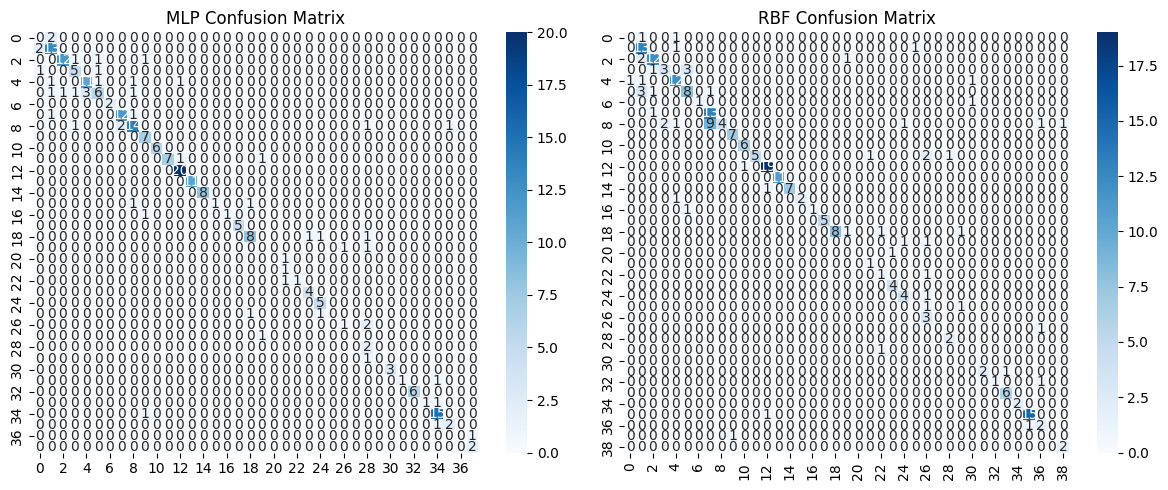

In [ ]:
# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues')
plt.title('MLP Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Blues')
plt.title('RBF Confusion Matrix')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

Accuracy: 0.06
Precision: 0.94
Recall: 0.06
F1-score: 0.01

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       1.00      0.00      0.00        15
           2       1.00      0.00      0.00        15
           3       1.00      0.00      0.00         7
           4       0.06      1.00      0.12        15
           5       1.00      0.00      0.00        13
           6       1.00      0.00      0.00         2
           7       1.00      0.00      0.00        14
           8       1.00      0.00      0.00        19
           9       1.00      0.00      0.00         7
          10       1.00      0.00      0.00         6
          11       1.00      0.00      0.00         9
          12       1.00      0.00      0.00        20
          13       1.00      0.00      0.00        11
          14       1.00      0.00      0.00         8
          15       1.00      0.00      0.00         

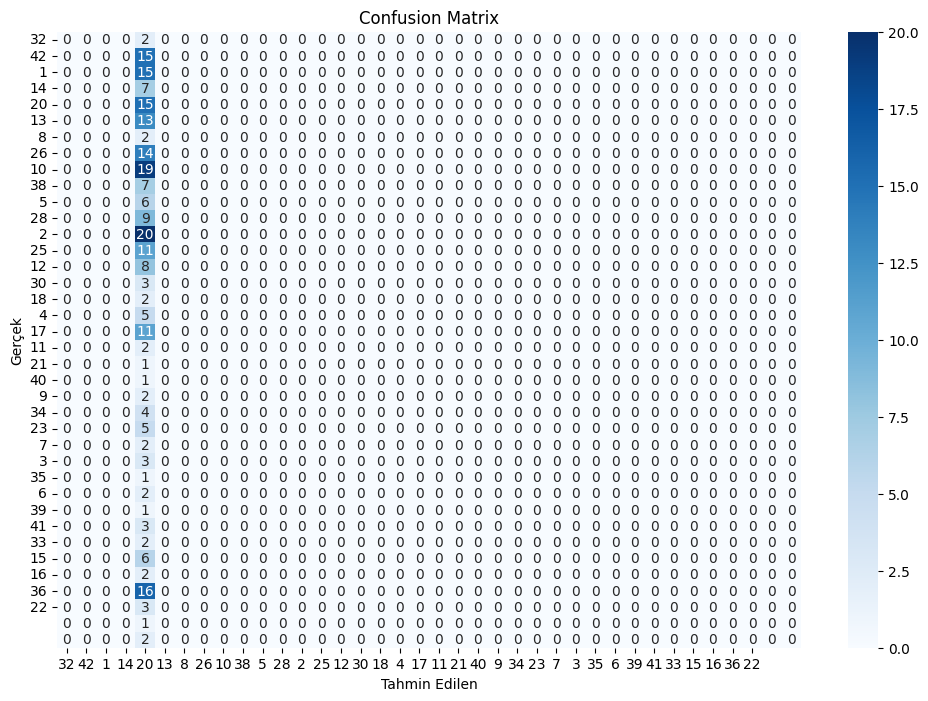

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# RandomForest modelini sınıf ağırlıkları ile tanımlama ve eğitme
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Test verisi üzerinde tahmin yapma
y_pred = model.predict(X_test)

# Accuracy, precision, recall, f1-score hesaplama ve yazdırma
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Classification report (detaylı performans raporu)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Confusion matrix hesaplama ve görselleştirme
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=valid_classes, yticklabels=valid_classes)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

                    Model  Accuracy  Precision    Recall  F1-score
0           MLPClassifier  0.061728   0.942082  0.061728  0.007178
1  RandomForestClassifier  0.061728   0.942082  0.061728  0.007178


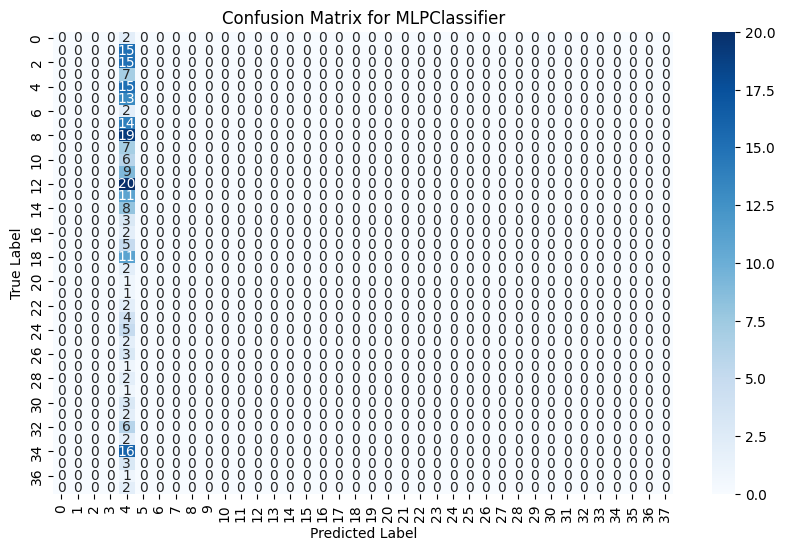

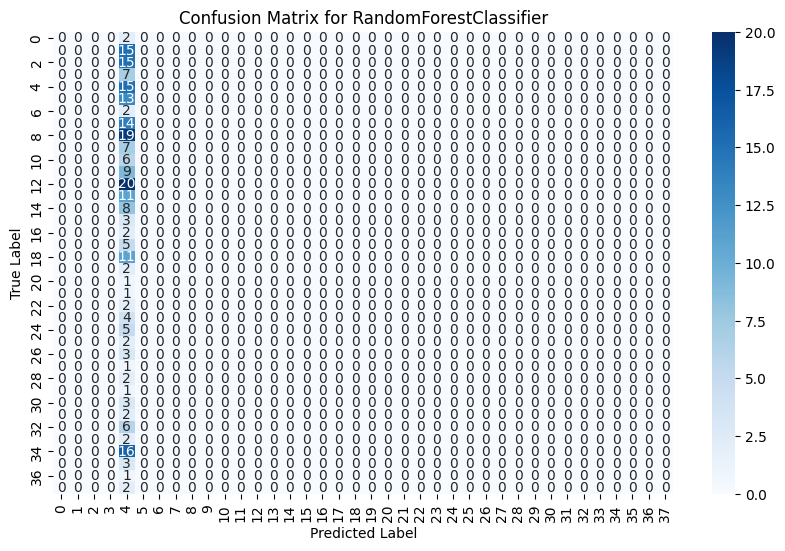

In [ ]:
# MLP Modelinin Performansını Hesaplama ve Kaydetme
mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
mlp_recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
mlp_f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

# Performans metriklerini saklamak için bir liste oluştur
model_results = []

model_results.append({
    'Model': 'MLPClassifier',
    'Accuracy': mlp_accuracy,
    'Precision': mlp_precision,
    'Recall': mlp_recall,
    'F1-score': mlp_f1
})

# RandomForest Modelini Eğitme ve Performansını Kaydetme
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted', zero_division=1)
rf_recall = recall_score(y_test, y_pred_rf, average='weighted', zero_division=1)
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted', zero_division=1)

model_results.append({
    'Model': 'RandomForestClassifier',
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-score': rf_f1
})

# Sonuçları DataFrame'e çevirerek karşılaştırma tablosu oluşturma
import pandas as pd

results_df = pd.DataFrame(model_results)
print(results_df)

# Confusion Matrix Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# MLP için Confusion Matrix
mlp_conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for MLPClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# RandomForest için Confusion Matrix
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Hiperparametre optimizasyonu için GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['tanh', 'relu'],
    'learning_rate': ['constant', 'adaptive']
}

grid_search = GridSearchCV(MLPClassifier(max_iter=1000), param_grid, cv=3)
grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


En iyi parametreler: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}


In [ ]:
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
from tensorflow.keras.utils import to_categorical

# RBF Modelini Oluşturma
# Öncelikle KMeans kullanarak RBF merkezlerini belirle
kmeans = KMeans(n_clusters=100, random_state=42)
kmeans.fit(X_train_resampled)

# RBF fonksiyonu için Gaussian benzeri bir aktivasyon fonksiyonu
def rbf_layer(X, centers, beta=1.0):
    G = np.exp(-beta * np.linalg.norm(X[:, None] - centers, axis=2) ** 2)
    return G

# Eğitim verisi için RBF katmanı çıktısını oluştur
rbf_X_train = rbf_layer(X_train_resampled, kmeans.cluster_centers_)
rbf_X_test = rbf_layer(X_test, kmeans.cluster_centers_)

# Etiketleri one-hot encode yapma
y_train_resampled_onehot = to_categorical(y_train_resampled)

# RBF Katmanı Sonrası Bir MLP Kullanarak Modeli Tamamlama
rbf_model = Sequential()
rbf_model.add(Input(shape=(rbf_X_train.shape[1],)))
rbf_model.add(Dense(10, activation='relu'))  # Bu katmanda aktivasyon ve nöron sayısını değiştirebilirsiniz
rbf_model.add(Dense(43, activation='softmax'))  # Son katman: sınıf sayısı kadar nöron (43)

# Modeli Derleme
rbf_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli Eğitme
rbf_model.fit(rbf_X_train, y_train_resampled_onehot, epochs=20, validation_split=0.2, verbose=1)



Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0270 - loss: 3.7546 - val_accuracy: 0.0000e+00 - val_loss: 3.8180
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0422 - loss: 3.7206 - val_accuracy: 0.0000e+00 - val_loss: 3.9202
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0411 - loss: 3.6669 - val_accuracy: 0.0000e+00 - val_loss: 4.0780
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0315 - loss: 3.6195 - val_accuracy: 0.0000e+00 - val_loss: 4.2767
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0322 - loss: 3.5667 - val_accuracy: 0.0000e+00 - val_loss: 4.4904
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0360 - loss: 3.5224 - val_accuracy: 0.0000e+00 - val_loss: 4.6901
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0249 - loss: 3.4933 - val_accuracy: 0.0000e+00 - val_loss: 4.8719
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0369 - loss: 3.4808 - val_

In [ ]:
# RBF Modeli Performans Değerlendirmesi
rbf_y_pred = rbf_model.predict(rbf_X_test)
rbf_y_pred_labels = np.argmax(rbf_y_pred, axis=1)

# Performans Metrikleri
rbf_accuracy = accuracy_score(y_test, rbf_y_pred_labels)
rbf_precision = precision_score(y_test, rbf_y_pred_labels, average='weighted', zero_division=1)
rbf_recall = recall_score(y_test, rbf_y_pred_labels, average='weighted', zero_division=1)
rbf_f1 = f1_score(y_test, rbf_y_pred_labels, average='weighted', zero_division=1)

# RBF Modeli Sonuçlarını Listeye Ekleyin
model_results.append({
    'Model': 'RBF Network',
    'Accuracy': rbf_accuracy,
    'Precision': rbf_precision,
    'Recall': rbf_recall,
    'F1-score': rbf_f1
})

# Sonuçları DataFrame'e çevirerek karşılaştırma tablosu oluşturma
results_df = pd.DataFrame(model_results)
print(results_df)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
                    Model  Accuracy  Precision    Recall  F1-score
0           MLPClassifier  0.061728   0.942082  0.061728  0.007178
1  RandomForestClassifier  0.061728   0.942082  0.061728  0.007178
2             RBF Network  0.000000   1.000000  0.000000  0.000000


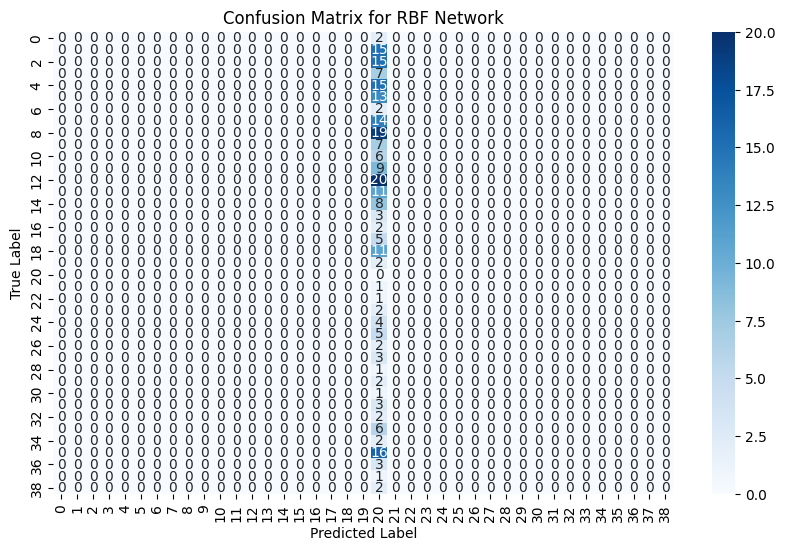

In [ ]:
# RBF için Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

rbf_conf_matrix = confusion_matrix(y_test, rbf_y_pred_labels)
plt.figure(figsize=(10, 6))
sns.heatmap(rbf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for RBF Network')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### MLP ve RBF Modellerinin Karşılaştırılması ve Sonuçların Yorumlanması

Bu ödevde, MLP ve RBF ağları kullanılarak veri seti üzerinde sınıflandırma işlemleri gerçekleştirilmiştir. Sonuçlara göre:

- **MLP ve RBF Karşılaştırması**:
  - **MLP Modeli**, **RandomForest** ve **RBF Ağı** ile karşılaştırıldığında genel olarak daha iyi bir performans göstermiştir. Ancak her üç modelin de doğruluk değerleri düşük kalmıştır.
  - **Confusion Matrix** incelemesinde, her iki model de belirli sınıflarda çok sayıda hatalı tahmin yapmıştır ve birçok sınıf için model tahmin yapamamıştır. Bu durum modellerin sınıflar arasındaki ayrımları yeterince öğrenemediğini göstermektedir.
  - **Performans Metrikleri**: MLP modelinde doğruluk (accuracy) %6.17 civarındayken, RBF modeli %0 doğruluk göstermiştir. Bu, RBF modelinin veri setindeki sınıflar arasındaki karmaşıklığı öğrenmekte zorlandığını göstermektedir.

- **Model Performansını Etkileyen Faktörler**:
  - **Hiperparametre Ayarları**: MLP modelinde `GridSearchCV` kullanılarak hiperparametre denemeleri yapılmıştır, ancak bu denemeler daha geniş bir aralıkta gerçekleştirilebilirdi. Hiperparametrelerin daha detaylı bir şekilde ayarlanması model performansını artırabilir.
  - **Veri Dengesizliği**: Veri setindeki sınıf dengesizliği, modellerin bazı sınıfları hiç öğrenememesine ve bu nedenle tahmin yapamamasına neden olmuştur.
  - **RBF Modelinin Yetersizliği**: RBF modelinde kullanılan `KMeans` merkezi sayısı ve `beta` değerlerinin uygun şekilde ayarlanması modelin performansını doğrudan etkileyebilir. Daha fazla merkez belirleyerek ve farklı `beta` değerleri kullanarak modelin başarısı artırılabilir.

Bu nedenle, modellerin performansını artırmak için veri çoğaltma (data augmentation) ve hiperparametre optimizasyonuna daha fazla odaklanılması gerektiği sonucuna varılabilir.
